# Téléchargement du fichier .cif 

In [9]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
import numpy as np
import matplotlib.pyplot as plt
import pymatgen.phonon.plotter as ppp


In [10]:
key = "xFkmtLT8p034lKKT"
material = "mp-961682"
m = MPRester(key)
s = m.get_structure_by_material_id(material,conventional_unit_cell=True)
doc = CifWriter(s)
doc.write_file(material+".cif")
display(FileLink(material+".cif"))

/home/users/a/c/achapaux/mp-961682.cif

# Plot de la structure de bande des phonons

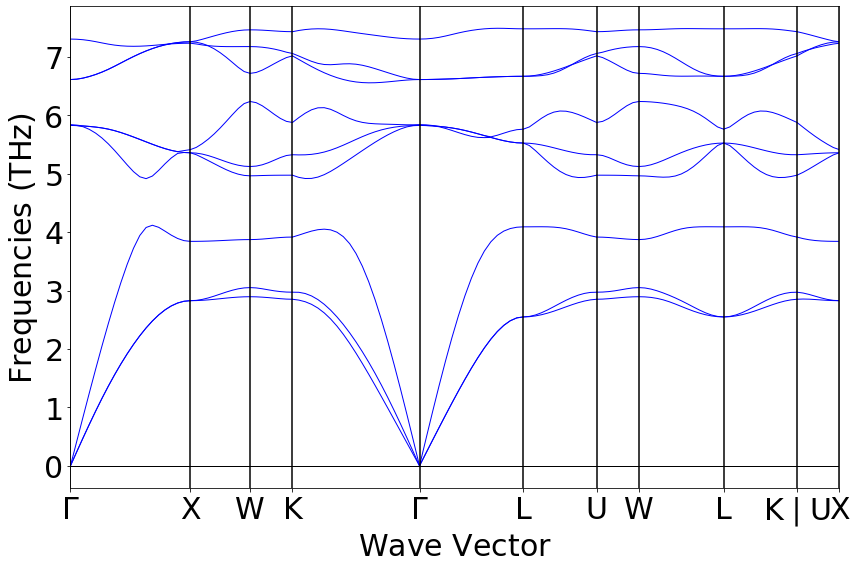

Les zones de Brillouin : 


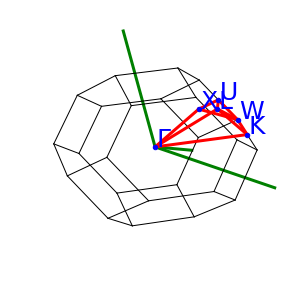

In [11]:
ph_struct = m.get_phonon_bandstructure_by_material_id(material)

bands = m.get_phonon_bandstructure_by_material_id(material)
plot = ppp.PhononBSPlotter(bands)
plot.show()

print("Les zones de Brillouin : ")
plot.plot_brillouin()


La formule pour calculer la vitesse est : $v =\dfrac{\partial \omega }{\partial q} = 2\pi \dfrac{\partial f }{\partial q}
$.  
Dans ce cas-ci, on l'approximera par la pente autour du point choisi :

Pour trouver les bandes acoustiques sont les bandes ou la fréquence du phonon associé est nulle :  
$\Gamma-X$  
$K-\Gamma$  
$\Gamma-L$  

In [12]:
data = plot.bs_plot_data()
Angstrom = 10**(-10) #attention à bien prendre en compte que les vecteurs d'ondes sont donnés en Angstrom.

distances = data.get("distances")
frequency = data.get("frequency")


#première courbe direction G-X
dist1 = distances[0] 
freq1 = frequency[0][0]
v_1 = 2*np.pi*abs(((freq1[1]-freq1[0])*(10**12))/((dist1[1]-dist1[0])/Angstrom))
print("La vitesse du son pour la courbe 1 et dans la direction \u0393 - X = ", str(v_1), "m/s")


#2 ème courbe direction K-G
dist2 = distances[3]   
freq2 = frequency[3][1]
v_2 = 2*np.pi*abs(((freq2[-1]-freq2[-2])*(10**12))/((dist2[-1]-dist2[-2])/Angstrom))
print("La vitesse du son pour la courbe 2 et dans la direction  K - \u0393 = ", str(v_2), "m/s")


#3 ème courbe direction G-L
dist3 = distances[4]   
freq3 = frequency[4][2]
v_3 = 2*np.pi*abs(((freq3[1]-freq3[0])*(10**12))/((dist3[1]-dist3[0])/Angstrom))
print("La vitesse du son pour la courbe 3 et dans la direction \u0393 - L = ", str(v_3), "m/s")




La vitesse du son pour la courbe 1 et dans la direction Γ - X =  2803.666524976953 m/s
La vitesse du son pour la courbe 2 et dans la direction  K - Γ =  2811.041961722089 m/s
La vitesse du son pour la courbe 3 et dans la direction Γ - L =  5240.341329865823 m/s
